In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_excel("C:/Users/sunst/Dropbox/PC/Downloads/NPS Apr'22 _ Raw.xlsx", sheet_name="Sheet1")

In [59]:
df.head()

campus                             satisfied with support  \
0            JECRC, Jaipur                               Quiz related queries   
1       GD Goenka, Gurgaon          Feedback of each faculty in each semester   
2  SAGE University, Indore  Yes, i am satisfied the way our faculty are al...   
3       GD Goenka, Gurgaon                                              Notes   
4          RGI, Coimbatore                                Yes , I'm satisfied   

                          Satisfied with the content  \
0                 Yes and offline is better as notes   
1  Feedback of students of each faculty after eve...   
2  The practical type of assignment is good for i...   
3                                    Teaching method   
4                             Concept based activity   

                  satisfied with the campus managers  \
0                                         Activeness   
1  Dont drag the course of 6 month into 2 month p...   
2  Every when we getting close to exams we need a...   
3                                                 No   
4                  All good with our campus manager.   

  How can we improve the flow of information about daily activities  \
0  Through the canvas and provide a video to lear...                  
1  Give us leave in every exam so that we can sco...                  
2  There is something we can explore more in the ...                  
3                                                 No                  
4                                               Yes.                  

          one thing to improve in internship process  \
0                          Clarity about the process   
1  We want to upgrade our skills so we want vario...   
2  Internship and Placement are two important and...   
3                                            Webinar   
4  Please provide sunstone base calendar of the y...   

              how to make sunstone experience better  
0  All campuses should equal for internship oppor...  
1  Good internship in good fields so that we can ...  
2  The way of teaching, best practices about the ...  
3                                                 No  
4  Satisfied , if we all got placed means very mu...

In [9]:
import re
import nltk.classify.util
from nltk.corpus import stopwords   # remove stopwords from the text 
from nltk.tokenize import word_tokenize # split the words
from nltk.corpus import wordnet  # finding similar opposite of words # finding meaning out of the words
from nltk import pos_tag
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # use this for sentiment analysis - polarity

In [10]:
# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

#### Pre-processing

In [11]:
def pre_process(sentence):
    ## clean text
    expression = re.compile(r'[^\w\s_]')
    cleaned_sentence = re.sub(expression,"",sentence)
    cleaned_sentence = re.sub('[\\n\\r]',"",cleaned_sentence)
    
    # tokenization and remove punctuations
    List_of_words = gensim.utils.simple_preprocess(str(cleaned_sentence),
                                                   deacc=True , min_len=2) # deacc=True removes punctuations
                                                                            # min_len will remove all token less than 2
    
    stop_words = stopwords.words('english')
    st_words = [word for word in List_of_words if word not in stop_words]
    
    return st_words

In [21]:
df = df.fillna("x")

In [22]:
 df["clean_q1"]=  df.iloc[:,1].apply(lambda x: pre_process(x))

In [23]:
 df["clean_q2"] =  df.iloc[:,2].apply(lambda x: pre_process(x))

In [24]:
df["clean_q3"] = df.iloc[:,3].apply(lambda x: pre_process(x))

In [25]:
df["clean_q4"] = df.iloc[:,4].apply(lambda x: pre_process(x))

In [26]:
df["clean_q5"] = df.iloc[:,5].apply(lambda x: pre_process(x))

In [27]:
df["clean_q6"] = df.iloc[:,6].apply(lambda x: pre_process(x))

In [29]:
df.to_csv("C:/Users/sunst/Dropbox/PC/Downloads/df_new.csv")

In [234]:
def sentiment_score(List):
    text = " ".join([word for word in List])
    Sentiment_Score = TextBlob(text).sentiment.polarity
    return Sentiment_Score

def sentiment_type(Score):
    if Score > 0:
        Sentiment_Cat = 'Positive'
    elif Score < 0:
        Sentiment_Cat = 'Negative'
    else:Sentiment_Cat = 'Neutral'
    
    return Sentiment_Cat

def postive_words(words):
    list_pos = []
    for word in words:
        polarity = TextBlob(word).sentiment.polarity
        if polarity > 0:
            list_pos.append(word)
    return list_pos

def negative_words(words):
    list_neg = []
    for word in words:
        polarity = TextBlob(word).sentiment.polarity
        if polarity < 0:
            list_neg.append(word)
    return list_neg

def neutral_words(words):
    list_neutral = []
    for word in words:
        polarity = TextBlob(word).sentiment.polarity
        if polarity == 0:
            list_neutral.append(word)
    return list_neutral

In [235]:
# define functions
# create new table
def create_sentiment_table(data, col):
    df = pd.DataFrame(data.iloc[:,col])
    df['campus'] = data['campus']
    df['Sentiment_Score'] =  df.iloc[:,0].apply(lambda x: sentiment_score(x))
    df['Sentiment_Type'] =  df.Sentiment_Score.apply(lambda x: sentiment_type(x))    
    df['Positive_words'] = df.iloc[:,0].apply(postive_words)
    df['Negative_words'] = df.iloc[:,0].apply(negative_words)
    df['Neutral_words'] = df.iloc[:,0].apply(neutral_words)
    return df


#create distribution
def create_pie_dist(data,title):
    plt.figure(figsize = (6,6))
    plt.title(title)
    plt.pie(data.Sentiment_Type.value_counts(), labels = data.Sentiment_Type.value_counts().index,colors = ['g','b','r'] ,
            autopct='%1.0f%%', explode=[0.1]*3)
    return plt.show()


## create bar for positive negative words
def create_pos_neg_bar(data, n = 20, title = "Top 20 Positive & Negative words based on Frequency"):
    #### get list of positive and negative words in whole dataset
    Pos_words = list()
    Neg_words = list()

    # divide all the words into positive and negative lists
    for row in range(len(data)):
        current_pos = data.Positive_words[row]
        current_neg = data.Negative_words[row]
        if len(current_pos) > 0:
            for word in current_pos:
                Pos_words.append(word)
        if len(current_neg) > 0:
            for word in current_neg:
                Neg_words.append(word)

    # convert each lists into frequency table 
    Pos_table = pd.Series(Pos_words).value_counts().reset_index()
    Neg_table = pd.Series(Neg_words).value_counts().reset_index()
    Pos_table.columns = ['word','frequency']
    Neg_table.columns = ['word','frequency']

    #sort by frequency
    Pos_table.sort_values(by='frequency',ascending =False, inplace = True)
    Neg_table.sort_values(by='frequency',ascending =False, inplace = True)

    plt.figure(figsize =(10,8))
    plt.title(title)
    plt.barh(Pos_table.head(n).word,Pos_table.head(n).frequency,color = 'green' , label = 'Positive Words' )
    plt.barh(Neg_table.head(n).word,Neg_table.head(n).frequency,color = 'red' , label = 'Negative Words' )
    plt.legend(loc = 'upper center')
    return plt.show()

# create wordcloud
def create_wc(data, positive = True):
    Pos_words = list()
    Neg_words = list()

    # divide all the words into positive and negative lists
    for row in range(len(data)):
        current_pos = data.Positive_words[row]
        current_neg = data.Negative_words[row]
        if len(current_pos) > 0:
            for word in current_pos:
                Pos_words.append(word)
        if len(current_neg) > 0:
            for word in current_neg:
                Neg_words.append(word)
                
    if positive:
        wordcloud_p = WordCloud(background_color='green', stopwords=set(stopwords.words('english')))
        wordcloud_p = wordcloud_p.generate(' '.join([word for word in Pos_words]))

        %matplotlib inline
        fig = plt.figure(figsize=(15, 12))
        plt.axis('off')
        plt.title('Positive Words',fontdict={'fontsize':25})
        plt.imshow(wordcloud_p)
        return plt.show()
    
    else:
        wordcloud_n = WordCloud(background_color='maroon', stopwords=set(stopwords.words('english')))
        wordcloud_n = wordcloud_n.generate(' '.join([word for word in Neg_words]))
        %matplotlib inline

        fig = plt.figure(figsize=(15, 12))
        plt.axis('off')
        plt.title('Negative Words',fontdict={'fontsize':25})
        plt.imshow(wordcloud_n)
        return plt.show()
    
    


In [256]:
def show_neutral_words(data, n = 30, title = "Top 20 neutral words based on Frequency"):
    #### get list of positive and negative words in whole dataset
    neu_words = list()
    # divide all the words into positive and negative lists
    for row in range(len(data)):
        cur_neu = data.Neutral_words[row]
        if len(cur_neu) > 0:
            for word in cur_neu:
                neu_words.append(word)

    # convert each lists into frequency table 
    neu_table = pd.Series(neu_words).value_counts().reset_index()
    neu_table.columns = ['word','frequency']
    #sort by frequency
    neu_table.sort_values(by='frequency',ascending =False, inplace = True)

    plt.figure(figsize =(10,8))
    plt.title(title)
    plt.barh(neu_table.head(n).word,neu_table.head(n).frequency,color = 'blue' , label = 'Neutral Words' )
    plt.legend(loc = 'upper center')
    plt.show()
    
    wordcloud_n = WordCloud(background_color='blue', stopwords=set(stopwords.words('english')))
    wordcloud_n = wordcloud_n.generate(' '.join([word for word in neu_words]))
    %matplotlib inline
    fig = plt.figure(figsize=(15, 12))
    plt.axis('off')
    plt.title('Neutral Words',fontdict={'fontsize':25})
    plt.imshow(wordcloud_n)
    return plt.show()




# Sentiment Analysis

### Q1. Were you satisfied with the kind of support you received from the faculty? 

In [236]:
df_1 = create_sentiment_table(df,1)

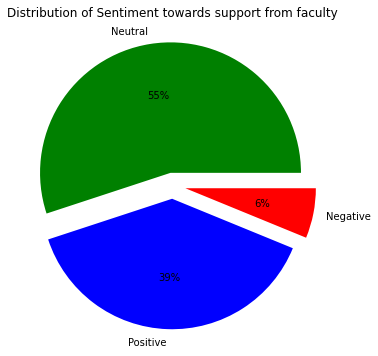

In [238]:
create_pie_dist(df_1,"Distribution of Sentiment towards support from faculty")

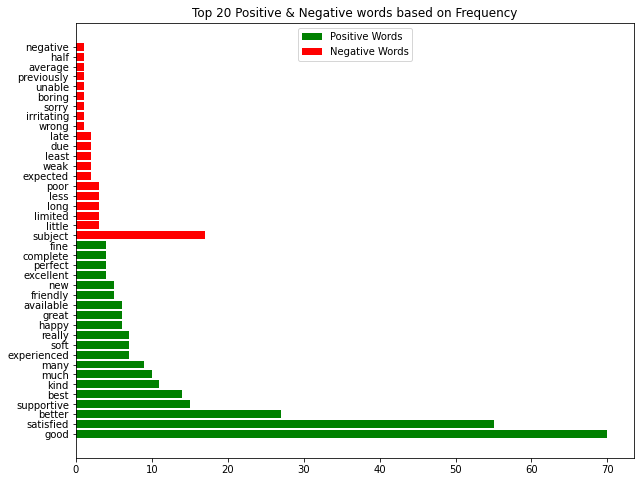

In [258]:
create_pos_neg_bar(df_1)

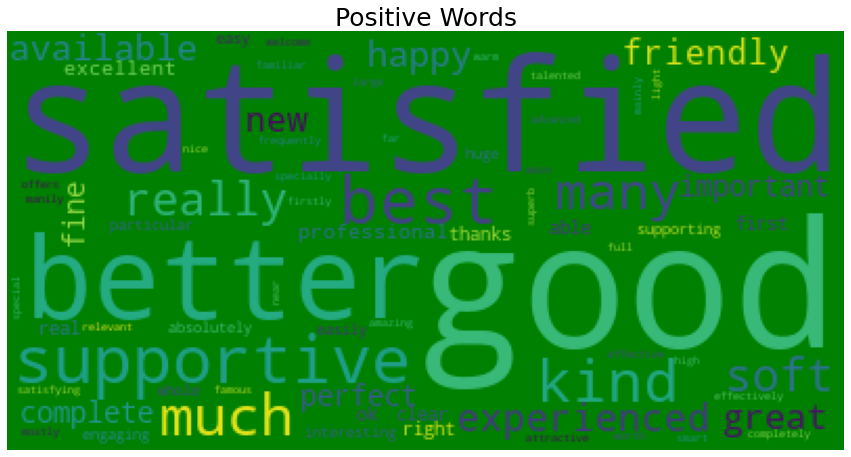

In [259]:
create_wc(df_1)

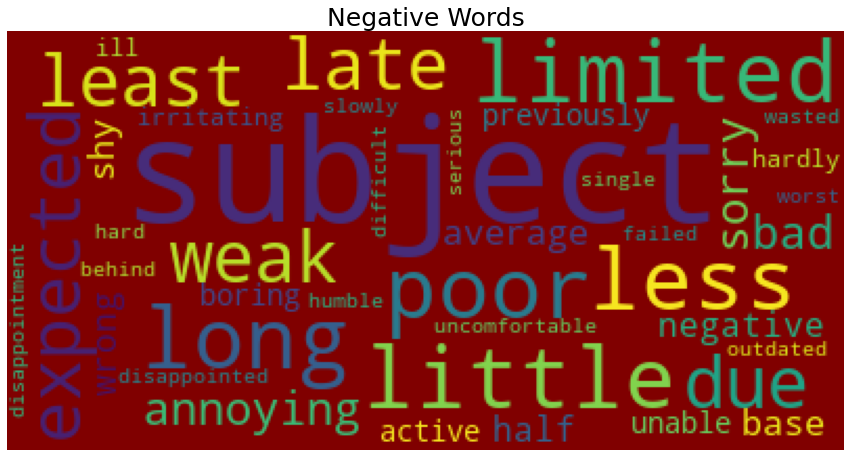

In [154]:
create_wc(df_1,positive=False)

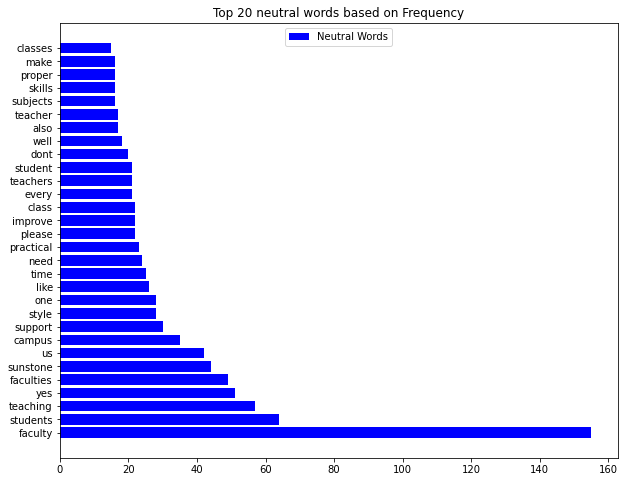

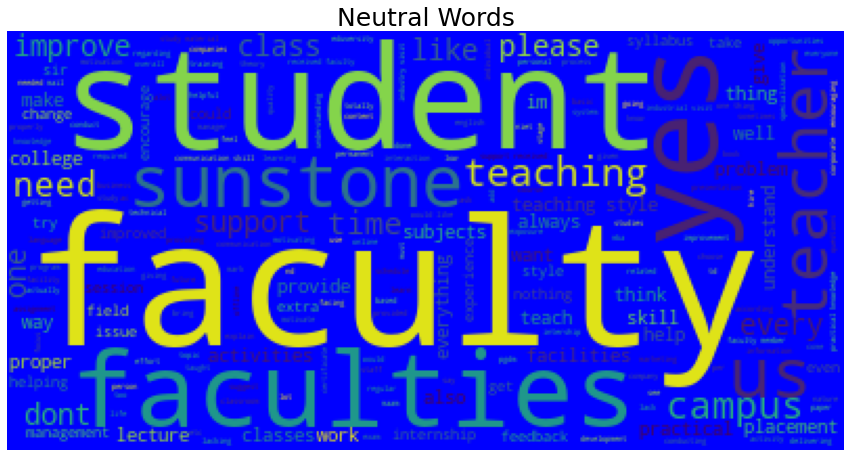

In [260]:
show_neutral_words(df_1)

----------------------------------------------------------
### Q2. Were you satisfied with the kind of content you were taught?


In [261]:
df_2 = create_sentiment_table(df,2)

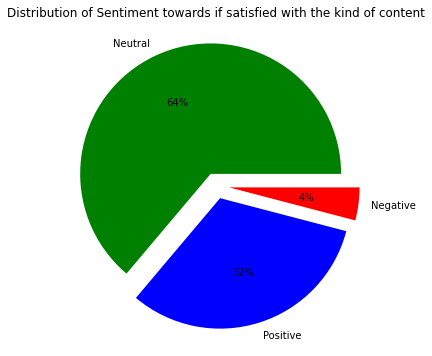

In [262]:
create_pie_dist(df_2,"Distribution of Sentiment towards if satisfied with the kind of content")

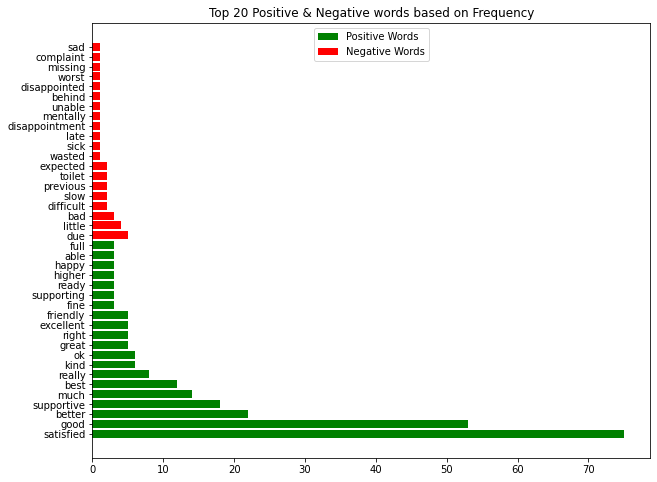

In [263]:
create_pos_neg_bar(df_3,20)

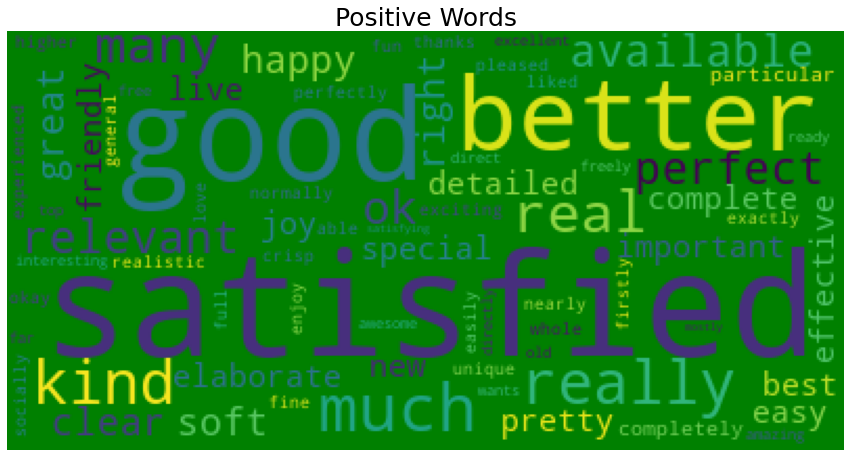

In [264]:
create_wc(df_2)

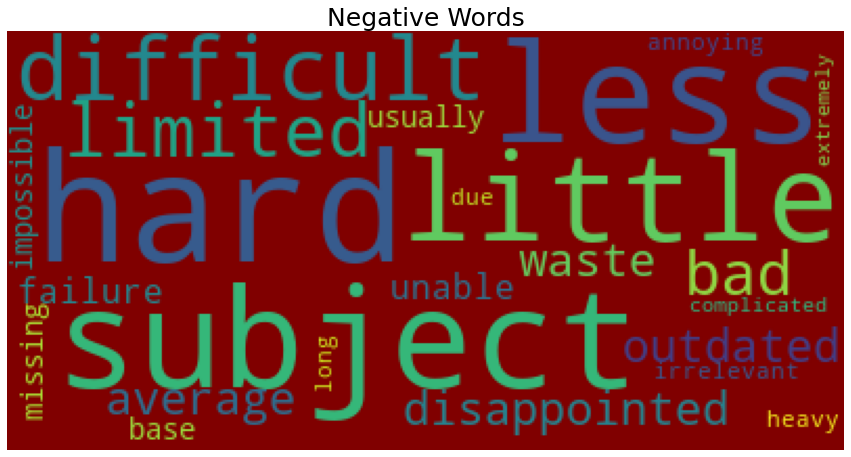

In [265]:
create_wc(df_2, positive=False)

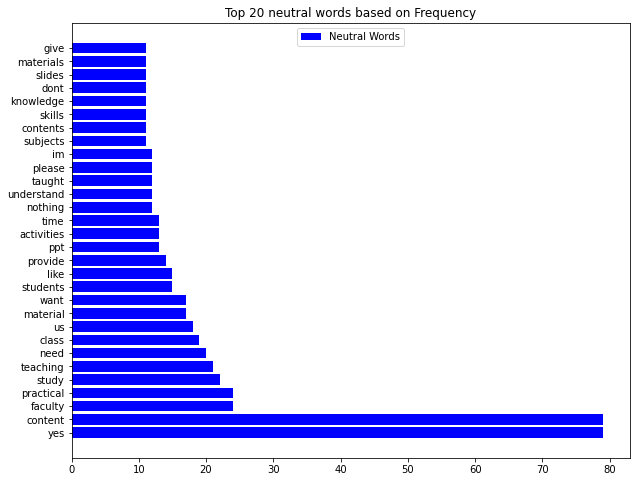

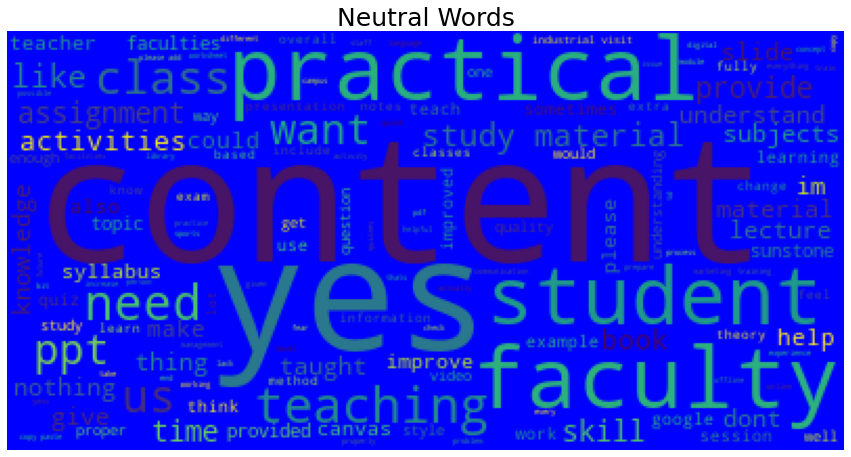

In [266]:
show_neutral_words(df_2)

----------------------------------------------------------------------------------

### Q3. "Were you satisfied with the kind of support you received from the campus coordinators/managers? 


In [267]:
df_3 =create_sentiment_table(df,3)

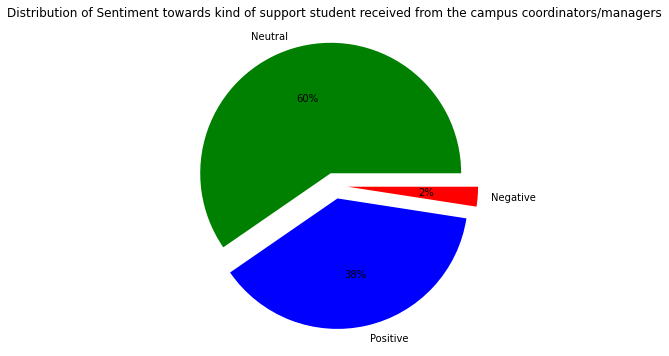

In [268]:
create_pie_dist(df_3, "Distribution of Sentiment towards kind of support student received from the campus coordinators/managers")

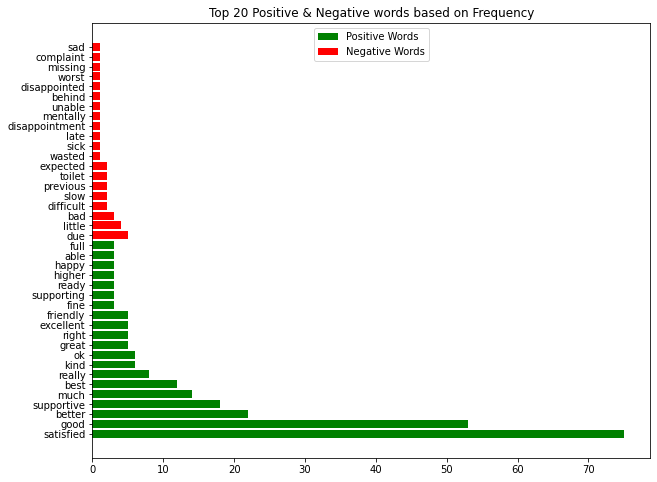

In [269]:
create_pos_neg_bar(df_3)

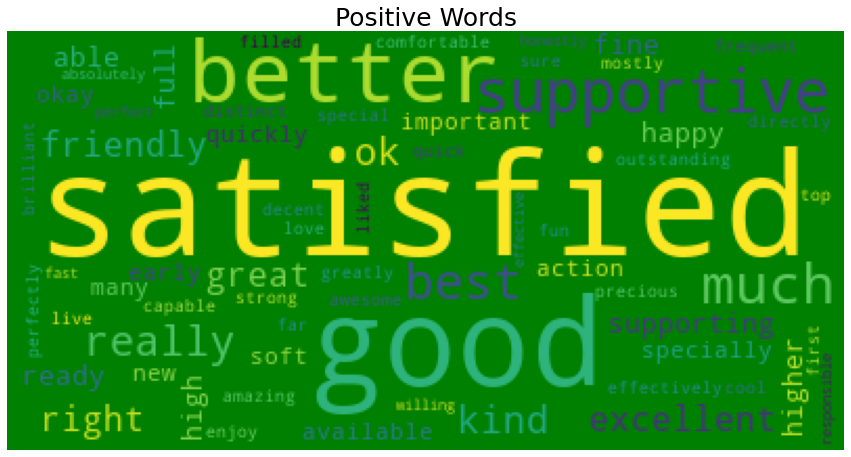

In [270]:
create_wc(df_3)

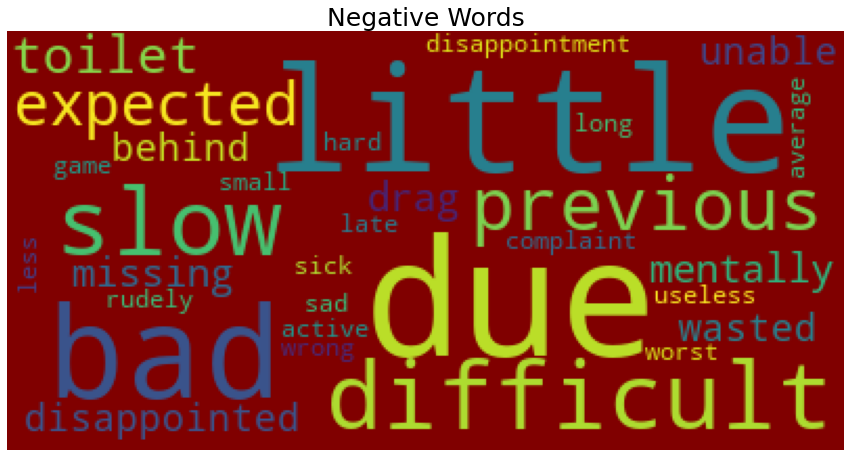

In [271]:
create_wc(df_3, positive=False)

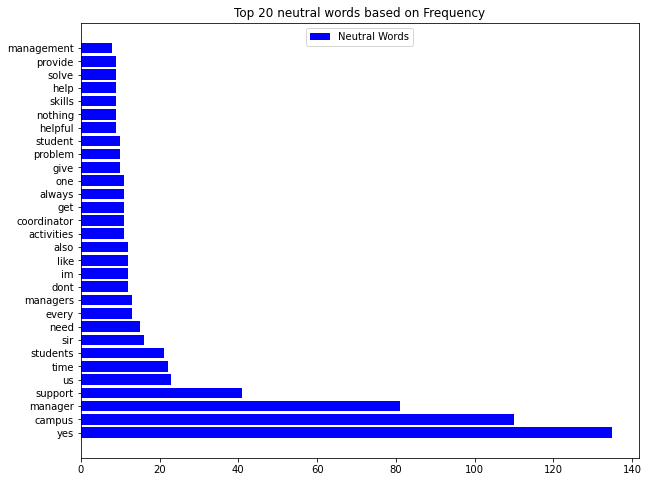

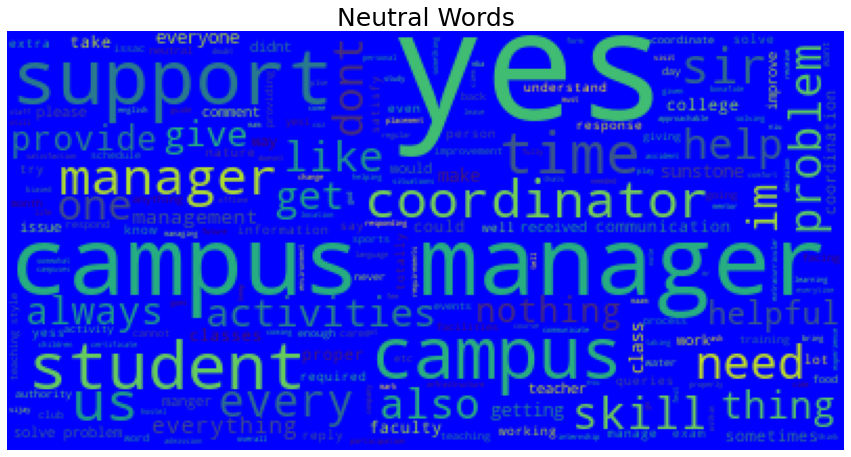

In [272]:
show_neutral_words(df_3)

----------------------------------------------------------------------

## Q4. How can we improve the flow of information about daily activities (class and exam schedule, distribution of syllabus, mark sheets, report cards, etc.) to make things easier?

In [273]:
df_4 = create_sentiment_table(df,4)

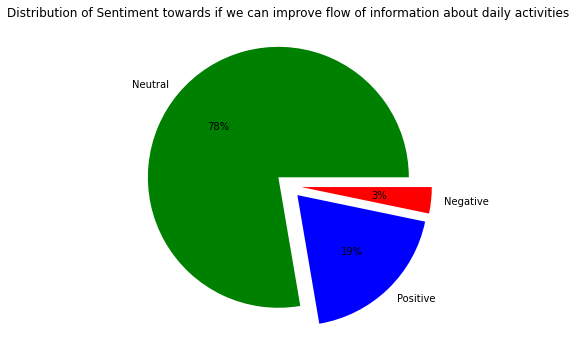

In [274]:
create_pie_dist(df_4,"Distribution of Sentiment towards if we can improve flow of information about daily activities")

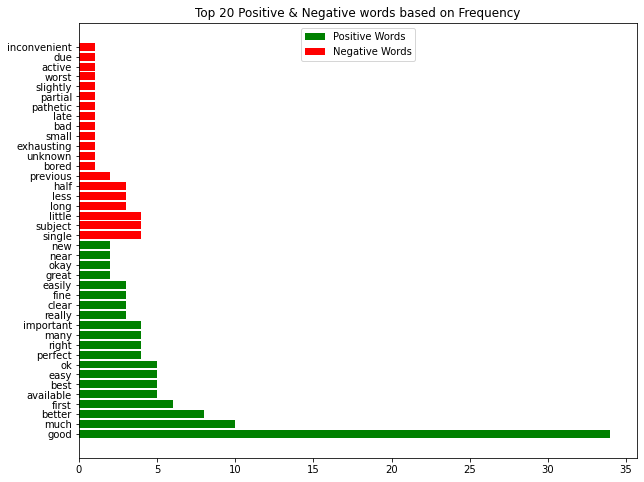

In [275]:
create_pos_neg_bar(df_4)

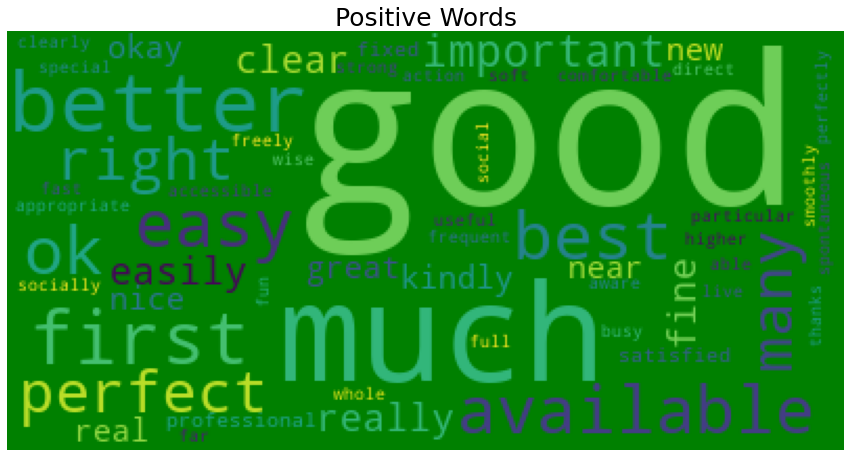

In [276]:
create_wc(df_4)

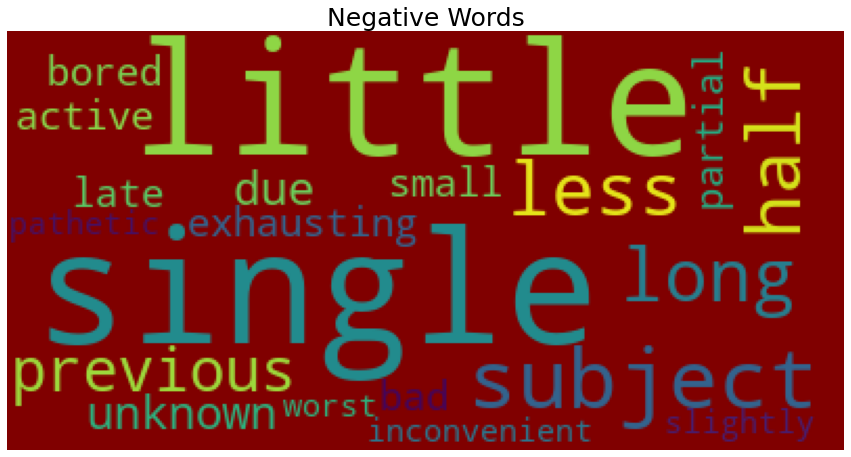

In [277]:
create_wc(df_4, positive=False)

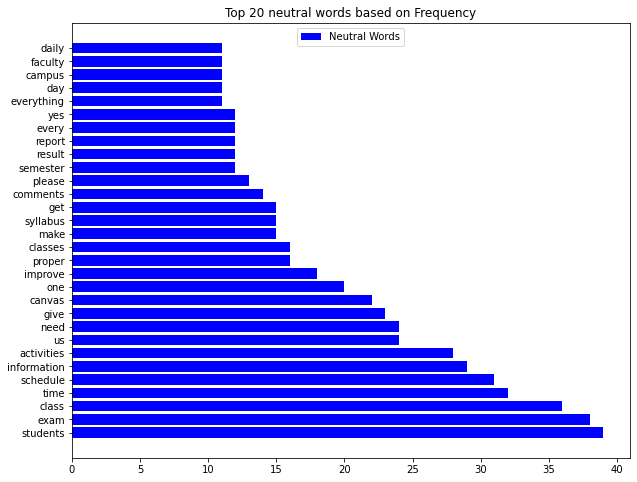

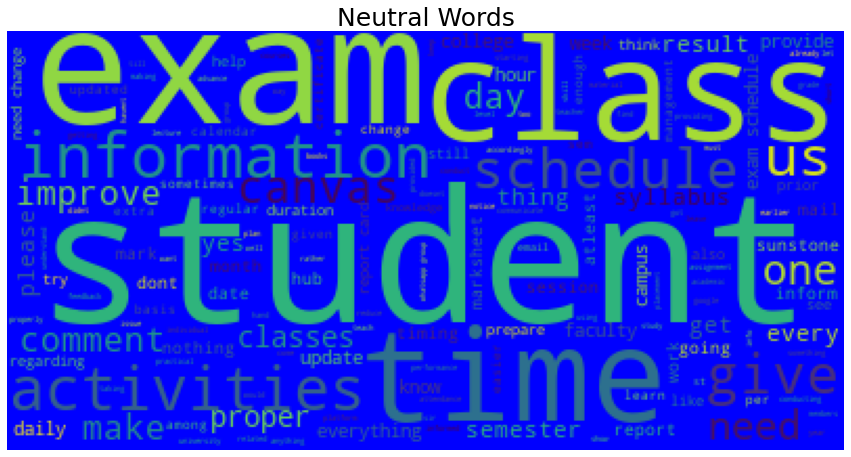

In [278]:
show_neutral_words(df_4)

----------------------------------------------------------------------

## Q5. What is *one* thing we can do to improve our internship processes and opportunities?

In [279]:
df_5 = create_sentiment_table(df,5)

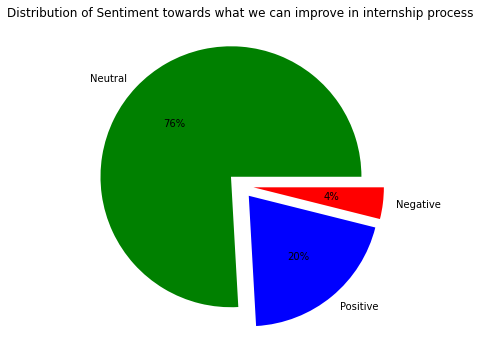

In [280]:
create_pie_dist(df_5,"Distribution of Sentiment towards what we can improve in internship process")

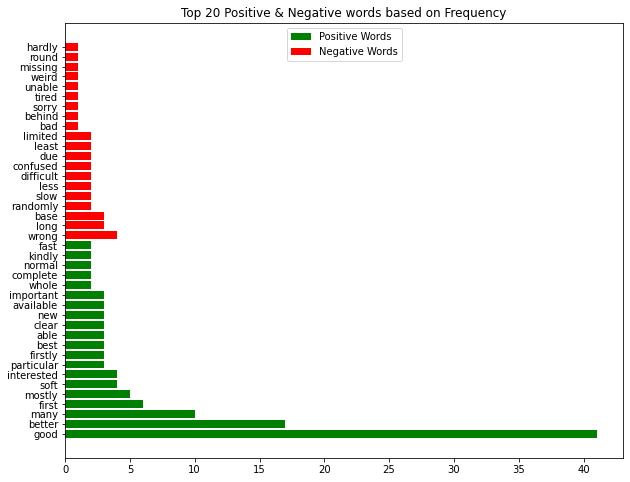

In [281]:
create_pos_neg_bar(df_5)

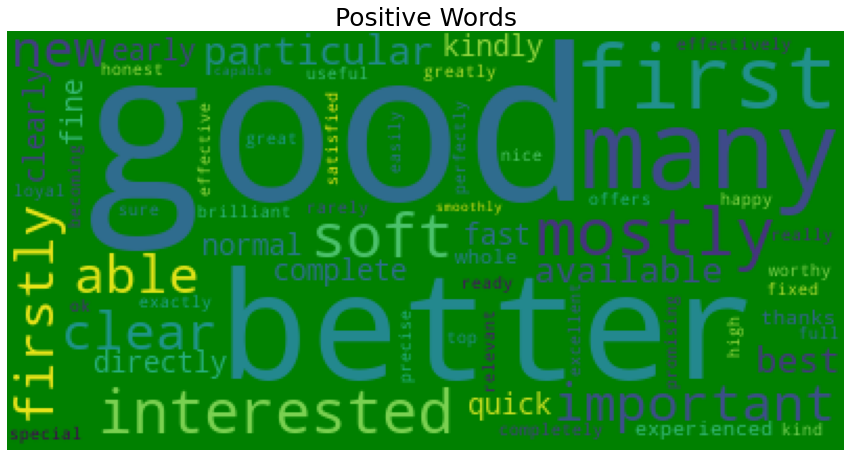

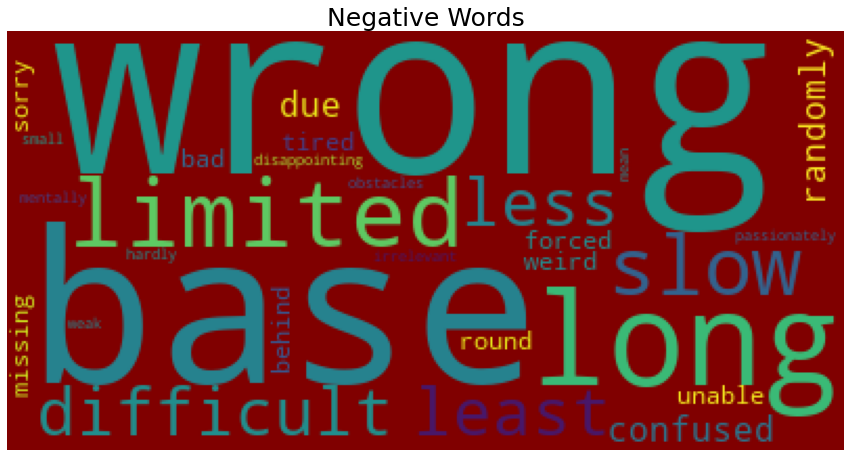

In [282]:
create_wc(df_5)
create_wc(df_5,positive=False)

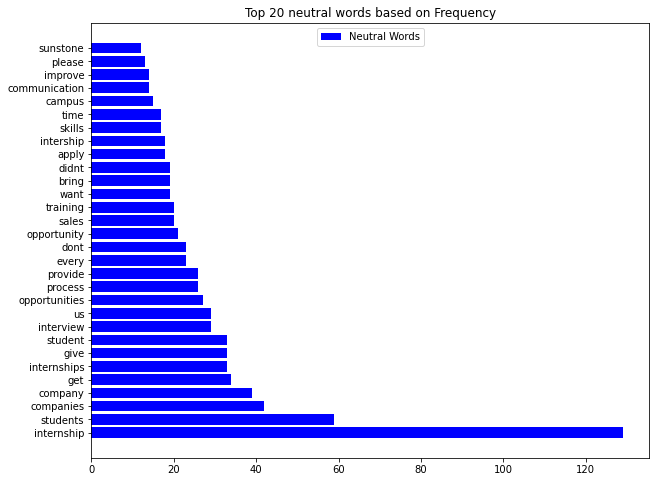

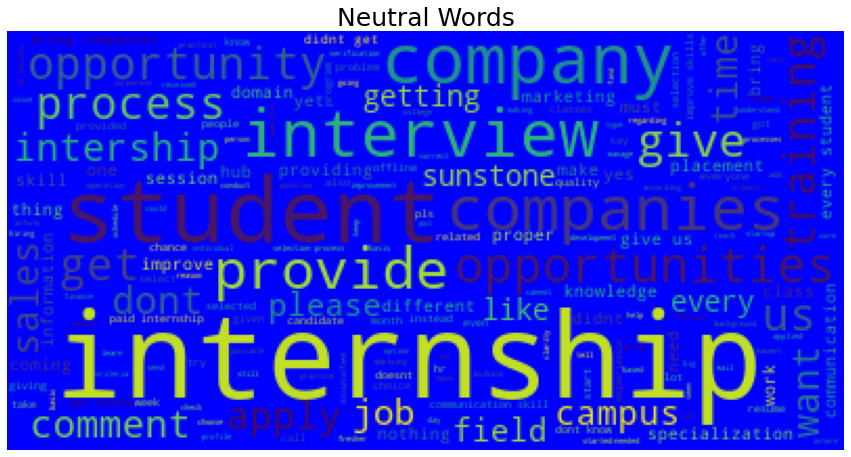

In [283]:
show_neutral_words(df_5)

----------------------------------------------------------------------

## Q6. What is the *one* thing we could do to make your experience at Sunstone better?

In [284]:
df_6 = create_sentiment_table(df,6)

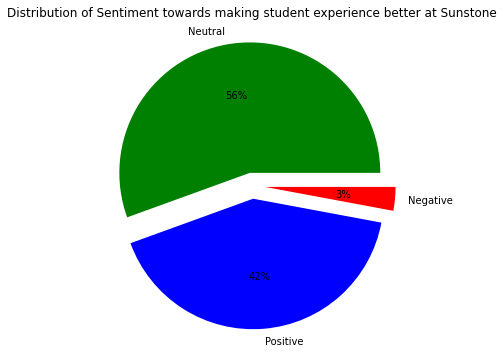

In [285]:
create_pie_dist(df_6,"Distribution of Sentiment towards making student experience better at Sunstone")

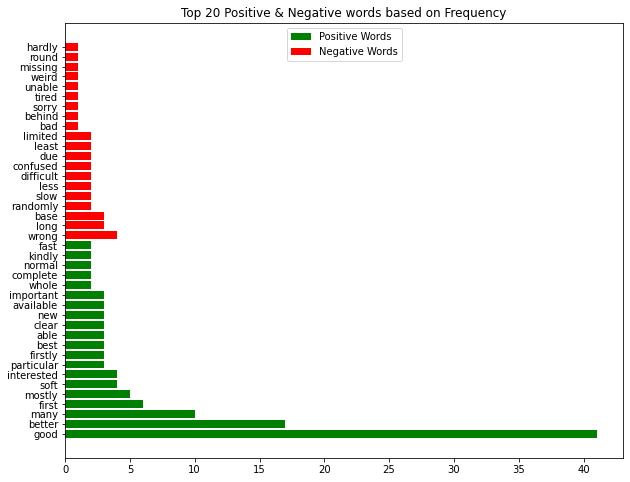

In [286]:
create_pos_neg_bar(df_5)

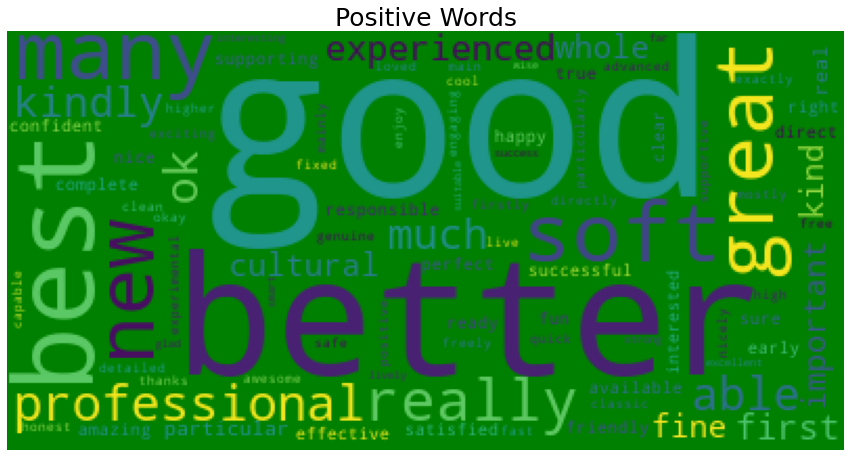

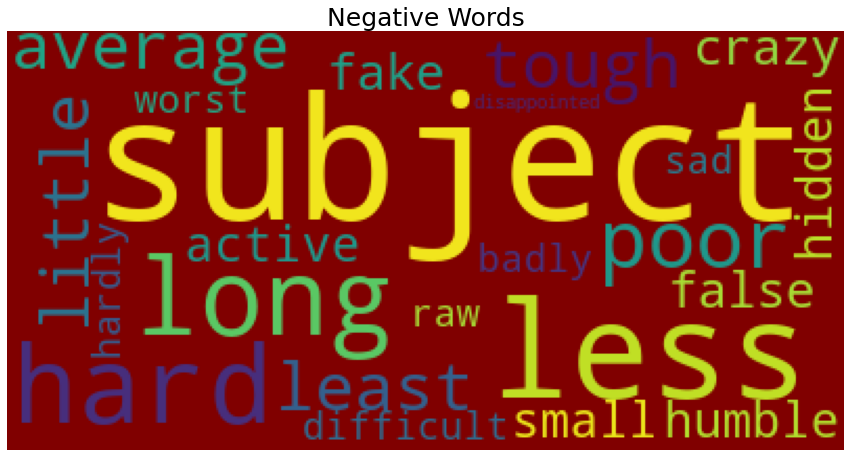

In [287]:
create_wc(df_6)
create_wc(df_6, positive=False)

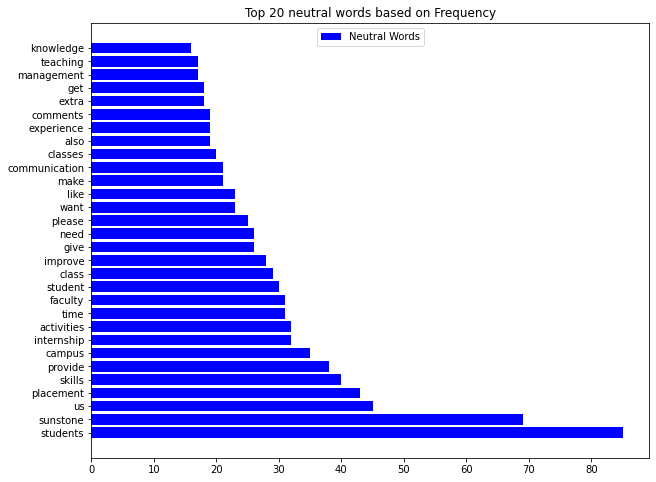

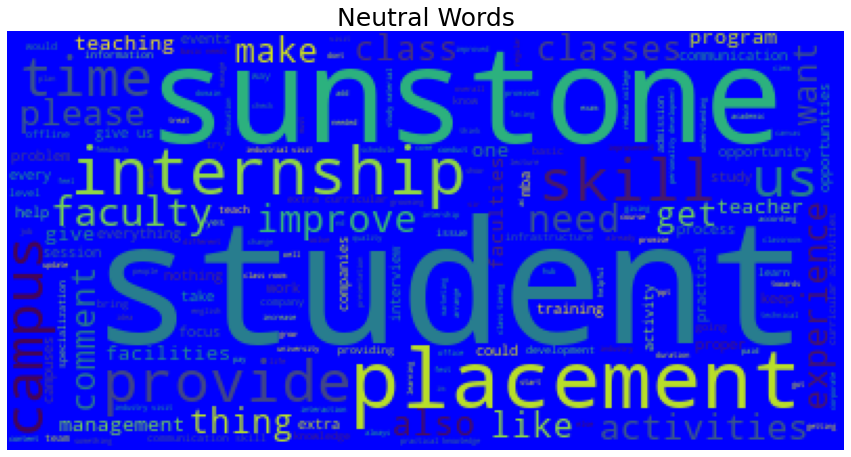

In [288]:
show_neutral_words(df_6)